import numpy as np
import matplotlib.pyplot as plt

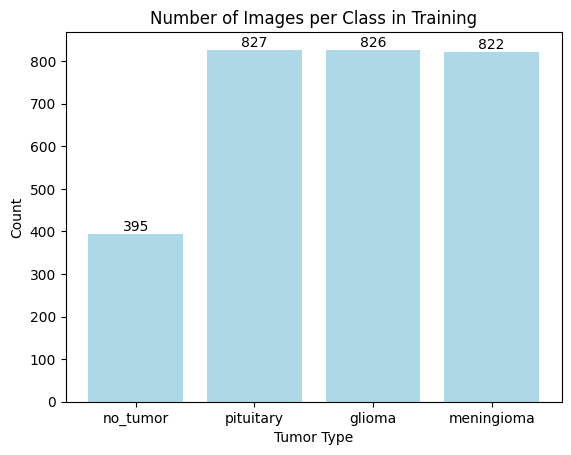

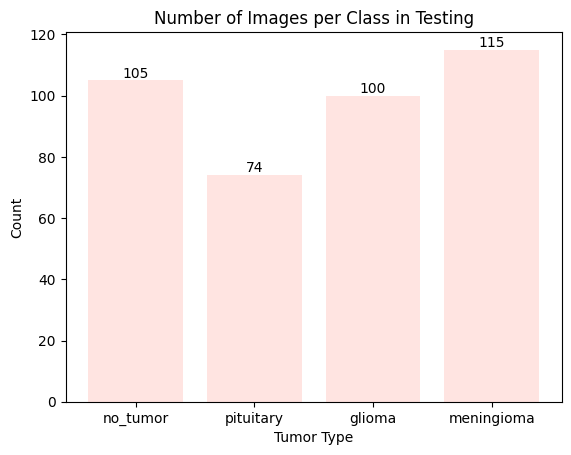

In [29]:
import os
import matplotlib.pyplot as plt

# Class labels
classes = os.listdir(train_dir)
# Training
train_dir = 'rawdata/train/'
class_counts_training = {cls: len(os.listdir(os.path.join(train_dir, cls))) for cls in classes}
# Testing 
test_dir = 'rawdata/test/'
class_counts_testing = {cls: len(os.listdir(os.path.join(test_dir, cls))) for cls in classes}

# Plot 1: Number of images in each class in the training set
bars = plt.bar(class_counts_training.keys(), class_counts_training.values(), color='lightblue')
plt.title("Number of Images per Class in Training")
plt.xlabel("Tumor Type")
plt.ylabel("Count")
plt.bar_label(bars)
plt.show()

# Plot 2: Number of images in each class in the testing set
bars = plt.bar(class_counts_testing.keys(), class_counts_testing.values(), color='mistyrose')
plt.title("Number of Images per Class in Testing")
plt.xlabel("Tumor Type")
plt.ylabel("Count")
plt.bar_label(bars)
plt.show()


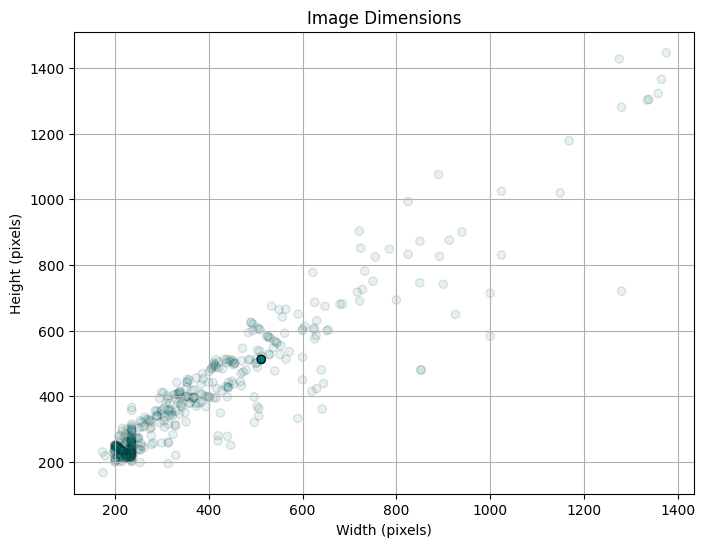

In [33]:
from collections import Counter
from PIL import Image

# Collect image sizes as (width, height) tuples
sizes = []

for directory in [train_dir, test_dir]:
    for cls in os.listdir(directory):
        class_path = os.path.join(directory, cls)
        for img_file in os.listdir(class_path):
            img_path = os.path.join(class_path, img_file)
            try:
                with Image.open(img_path) as img:
                    w, h = img.size
                    sizes.append((w, h))
            except:
                continue

# Count frequency of each (width, height)
size_counts = Counter(sizes)

# Separate into x, y, and alpha values for plotting
xs = []
ys = []
alphas = []

max_count = max(size_counts.values())
for (w, h), count in size_counts.items():
    xs.append(w)
    ys.append(h)
    # Scale alpha based on frequency (0.1 to 1.0)
    alphas.append(0.1 + 0.9 * (count / max_count))

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(xs, ys, alpha=alphas, color='teal', edgecolors='k')
plt.title("Image Dimensions")
plt.xlabel("Width (pixels)")
plt.ylabel("Height (pixels)")
plt.grid(True)
plt.show()
